# BISMILLAH SING BEUNGHAR

## Convention

- Naming variable with ***snake_case***
- Use **Type Declaration** for every variables and functions
- **Zero** use of comments *(unless necessary)*
- Always write long arguments of a function with **newline**

In [1]:
definition: dict = {
    'ID_Transaction': 'Unique identifier for each transaction or event.',
    'temperature': 'Maximum temperature recorded over the last 10 hours in degrees Celsius.',
    'temperature_min': 'Minimum temperature recorded over the last 10 hours in degrees Celsius.',
    'temperature-1': 'Recorded temperature value from sensor 1 (unit: °C).',
    'temperature-2': 'Recorded temperature value from sensor 2 (unit: °C).',
    'temperature-3': 'Recorded temperature value from sensor 3 (unit: °C).',
    'apparent_temperature_max': 'Maximum perceived or "feels-like" temperature (unit: °C).',
    'apparent_temperature_min': 'Minimum perceived or "feels-like" temperature (unit: °C).',
    'ID_Area': 'Identifier for the specific area or region.',
    'Machine': 'Identifier or name of the machine involved in the event.',
    'timestamp': 'Timestamp of the recorded event or transaction.',
    'humidity': 'Recorded humidity level (percentage).',
    'Voltage-L': 'Voltage recorded on line L (unit: volts).',
    'Voltage-R': 'Voltage recorded on line R (unit: volts).',
    'Voltage-M': 'Voltage recorded on line M (unit: volts).',
    'Current-M': 'Current recorded on line M (unit: amperes).',
    'Current-R': 'Current recorded on line R (unit: amperes).',
    'Current-T': 'Current recorded on line T (unit: amperes).',
    'RPM': 'Rotations per minute of the primary system or component.',
    'RPM-1': 'Rotations per minute recorded by sensor 1.',
    'RPM-2': 'Rotations per minute recorded by sensor 2.',
    'RPM-3': 'Rotations per minute recorded by sensor 3.',
    'Vibration-1': 'Vibration intensity recorded by sensor 1 (unit: mm/s or m/s²).',
    'Vibration-2': 'Vibration intensity recorded by sensor 2 (unit: mm/s or m/s²).',
    'Power': 'Power consumption or output of the system (unit: watts).',
    'Power_Backup': 'Indicates whether the backup power system was utilized (Yes/No).',
    'Status': 'Operational status of the machine, indicating whether it is in "Breakdown" or "Normal" condition.',
    'Breakdown_Category': 'Specific category or cause of breakdown.',
    "Mesin": "Name or description of the machine.",
    "Country Machine": "Country from which the machine was imported.",
    "ID_Area": "Identifier for the area or region where the machine is located.",
    "Last Maintenance": "Date of the most recent maintenance performed on the machine.",
    "Status Sparepart": "Availability of spare parts for the machine (e.g., Available, Not Available).",
    "Age": "Age of the machine in years (or other relevant unit)."
}


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import mutual_info_regression


In [2]:
pd.set_option('display.max_columns', None)

## Importing Datasets

In [5]:
datachunks = []

# for chunk in pd.read_csv("dataset/train.csv", chunksize=100000):
#     datachunks.append(chunk)

# train_df = pd.concat(datachunks, ignore_index=True)
train_df = pd.read_csv("dataset/train.csv", nrows=1000000)
test_df = pd.read_csv("dataset/test.csv", nrows=1000000)

In [5]:
_Status = pd.get_dummies(train_df['Status'], prefix = "Status").astype(int)
train_df = pd.concat([train_df, _Status], axis=1)

In [3]:
machine_area_df : pd.DataFrame = pd.read_csv("dataset/Machine-Area.csv")
machine_list_df : pd.DataFrame = pd.read_csv("dataset/Machine-List.csv")
area_list_df    : pd.DataFrame = pd.read_csv("dataset/Area-List.csv")

In [11]:
machine_area_df.loc[machine_area_df['ID_Mesin'] == 'I.2']

,ID_Mesin,Mesin,Country Machine,ID_Area,Last Maintenance,Status Sparepart,Age
587,I.2,Risco-TR400,CN,ID10,2021-10-20,In Use,6
562,I.2,Risco-TR400,CN,ID12,2021-02-13,Ready,10
440,I.2,Risco-TR400,CN,ID14,2020-09-09,On Check,5
544,I.2,Risco-TR400,CN,ID16,2021-05-20,Repair,17
1060,I.2,Risco-TR400,CN,ID18,2021-03-17,Repair,9
1167,I.2,Risco-TR400,CN,ID2,2021-12-24,Repair,11
770,I.2,Risco-TR400,CN,ID20,2021-04-15,Repair,5
1164,I.2,Risco-TR400,CN,ID22,2020-12-29,Empty,16
851,I.2,Risco-TR400,CN,ID24,2021-08-16,In Use,1
157,I.2,Risco-TR400,CN,ID26,2021-12-26,Broken,13


## Data Definition

In [7]:
train_df.dtypes

ID_Transaction               object
temperature_10H_max (°C)    float64
temperature_10H_min (°C)    float64
temperature-1               float64
temperature-2               float64
temperature-3               float64
apparent_temperature_max    float64
apparent_temperature_min    float64
ID_Area                      object
Machine                      object
timestamp                    object
humidity                    float64
Voltage-L                   float64
Voltage-R                   float64
Voltage-M                   float64
Current-M                   float64
Current-R                   float64
Current-T                   float64
RPM                         float64
RPM-1                       float64
RPM-2                       float64
RPM-3                       float64
Vibration-1                 float64
Vibration-2                 float64
Power                       float64
Power_Backup                 object
Status                       object
Breakdown Category          

In [8]:
machine_list_df.dtypes.sort_values()

ID_Mesin           object
Mesin              object
Country Machine    object
dtype: object

In [9]:
machine_area_df.dtypes.sort_values()

Age                  int64
ID_Mesin            object
Mesin               object
Country Machine     object
ID_Area             object
Last Maintenance    object
Status Sparepart    object
dtype: object

In [10]:
area_list_df.dtypes.sort_values()

ID_Area     object
Area        object
Priority    object
dtype: object

### Entity Relationship Diagram

![alt text](assets/erd-full.png "Title")

## Data Distribution

### Barplot

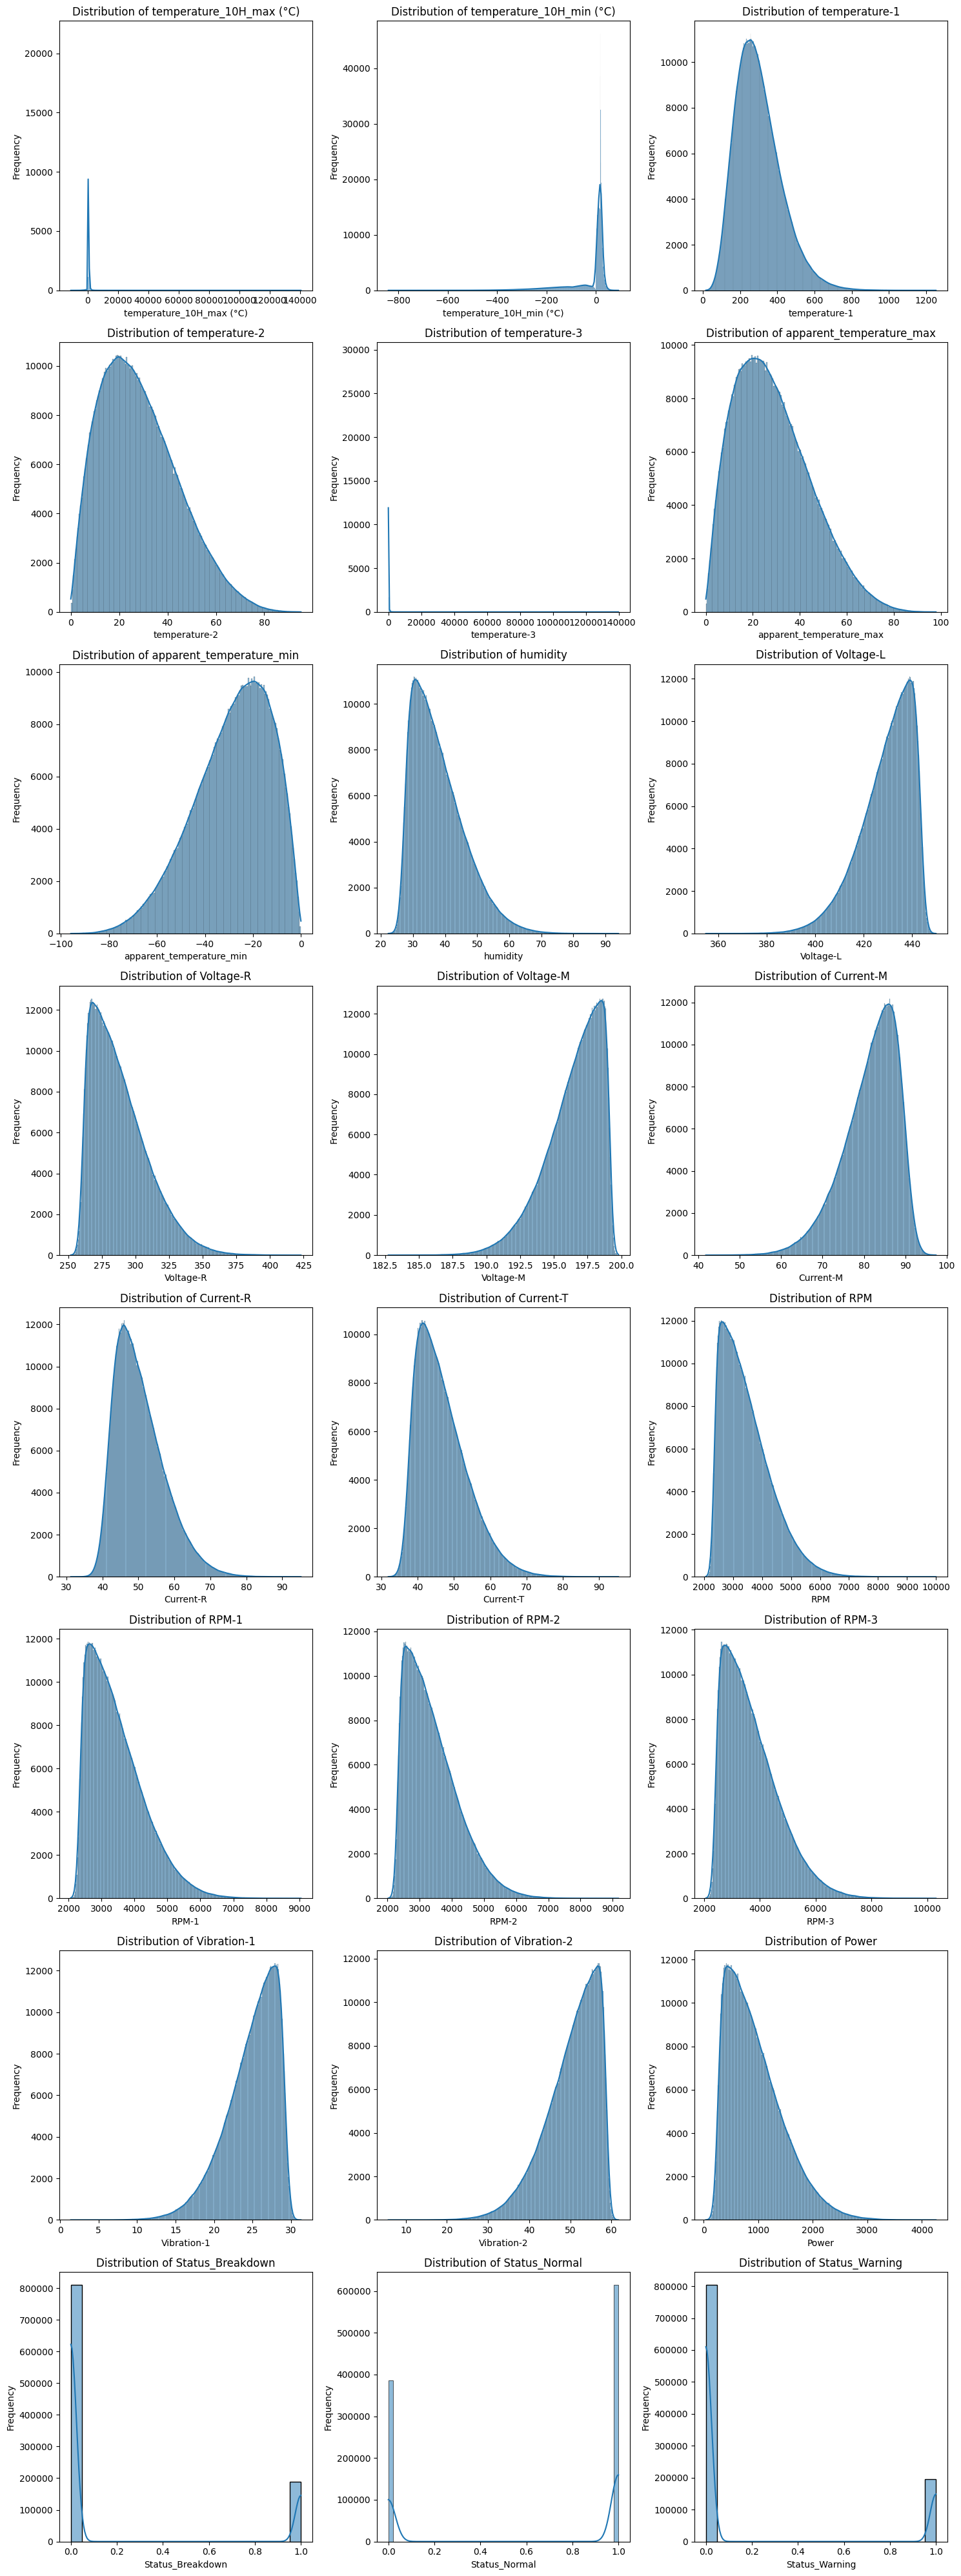

In [11]:
numeric_columns : list[str] = train_df.select_dtypes(include="number").columns
n_cols: int = len(numeric_columns)
n_rows: int = np.ceil(n_cols / 3).astype(int)

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(train_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### KDE Plot

#### By Status

C:\Users\Adli\AppData\Local\Temp\ipykernel_13876\3154243591.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train_df, x=col, hue='Status', fill=True, common_norm=False, alpha=0.5, ax=axes[i])
C:\Users\Adli\AppData\Local\Temp\ipykernel_13876\3154243591.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train_df, x=col, hue='Status', fill=True, common_norm=False, alpha=0.5, ax=axes[i])
C:\Users\Adli\AppData\Local\Temp\ipykernel_13876\3154243591.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train_df, x=col, hue='Status', fill=True, common_norm=False, alpha=0.5, ax=axes[i])


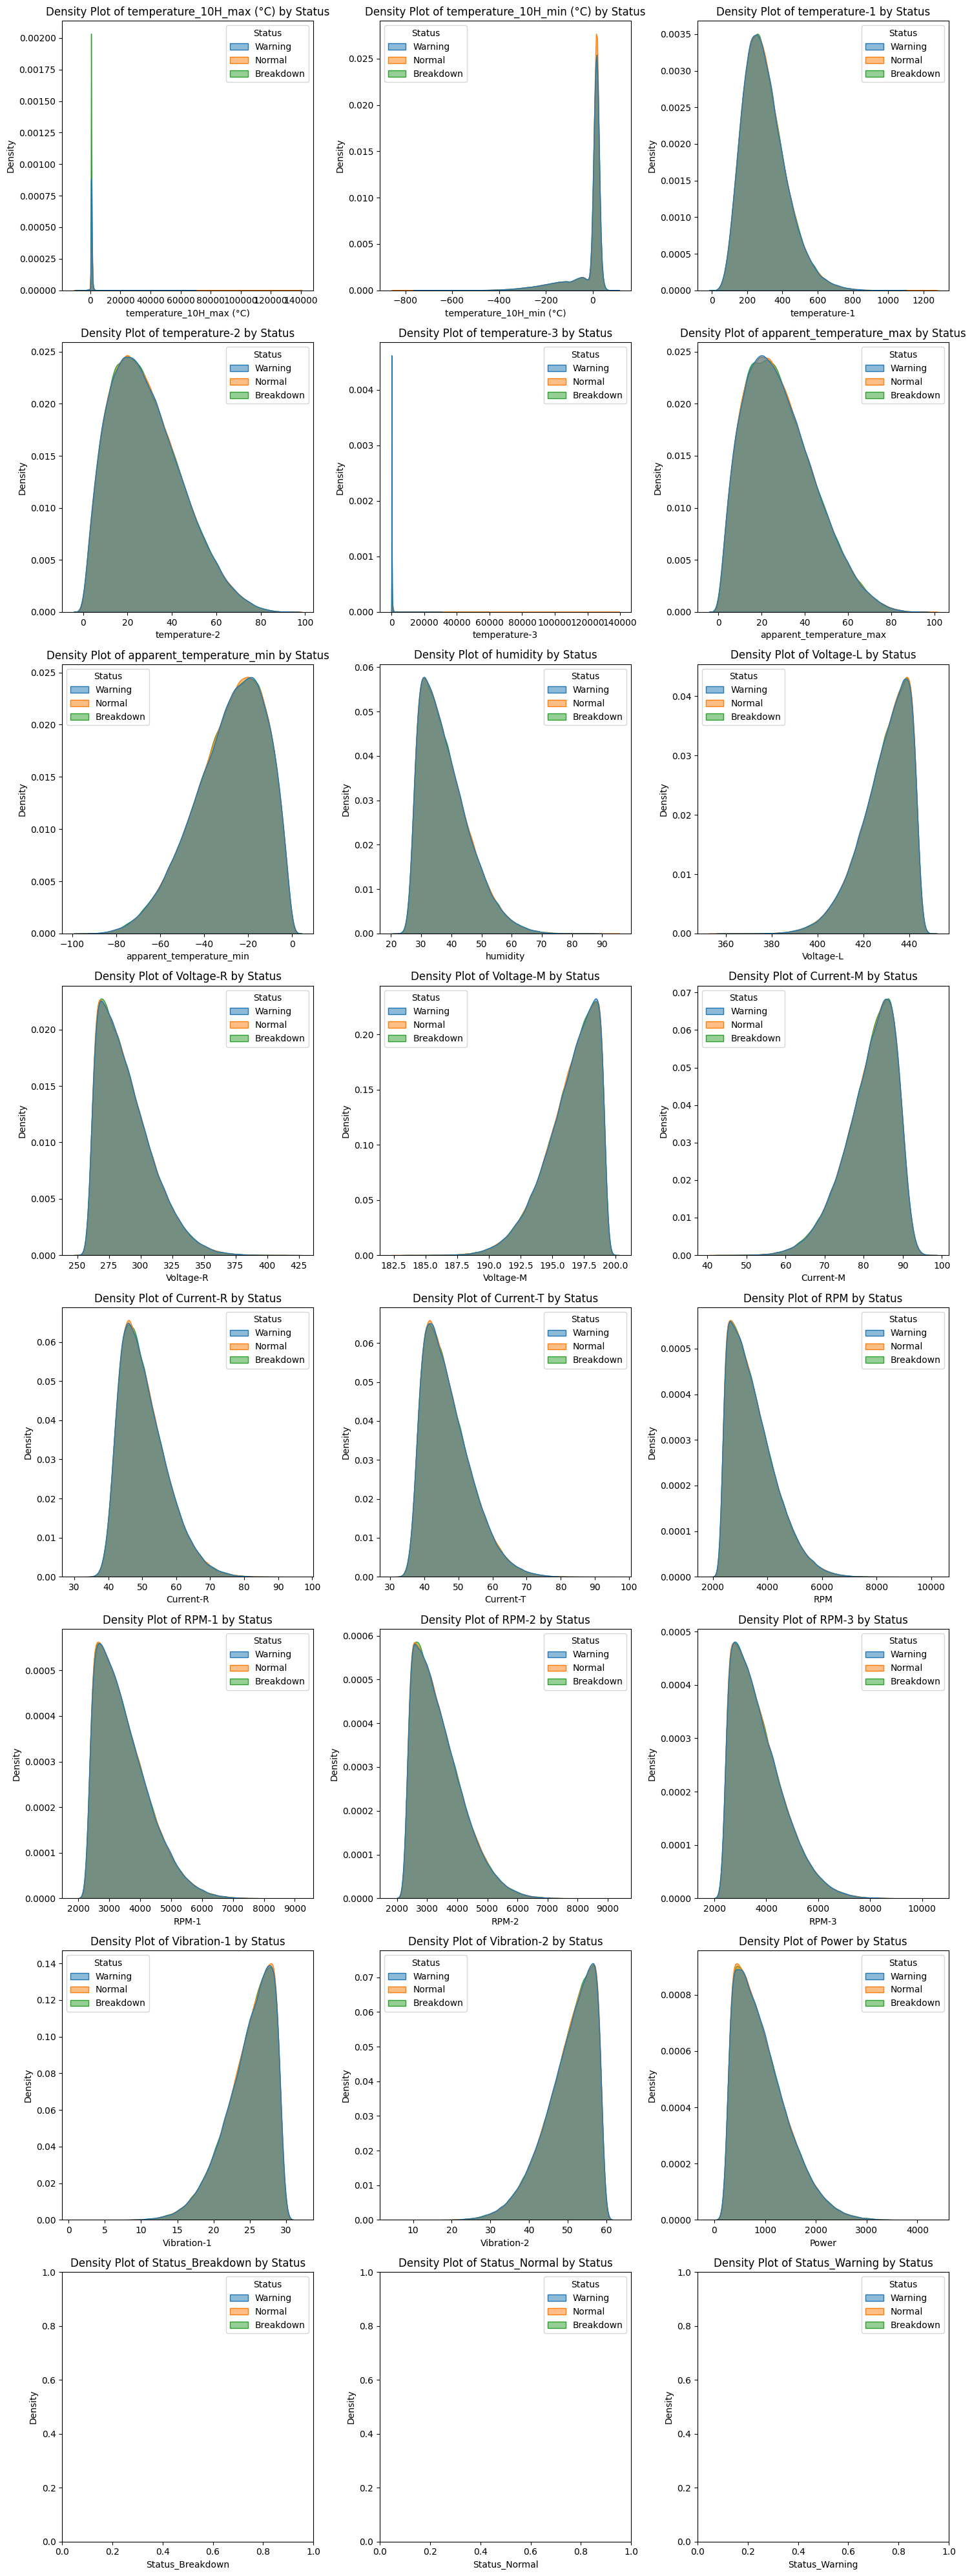

In [58]:
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=train_df, x=col, hue='Status', fill=True, common_norm=False, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Density Plot of {col} by Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.savefig("assets/density_plot.png")
plt.show()


#### By Breakdown Category

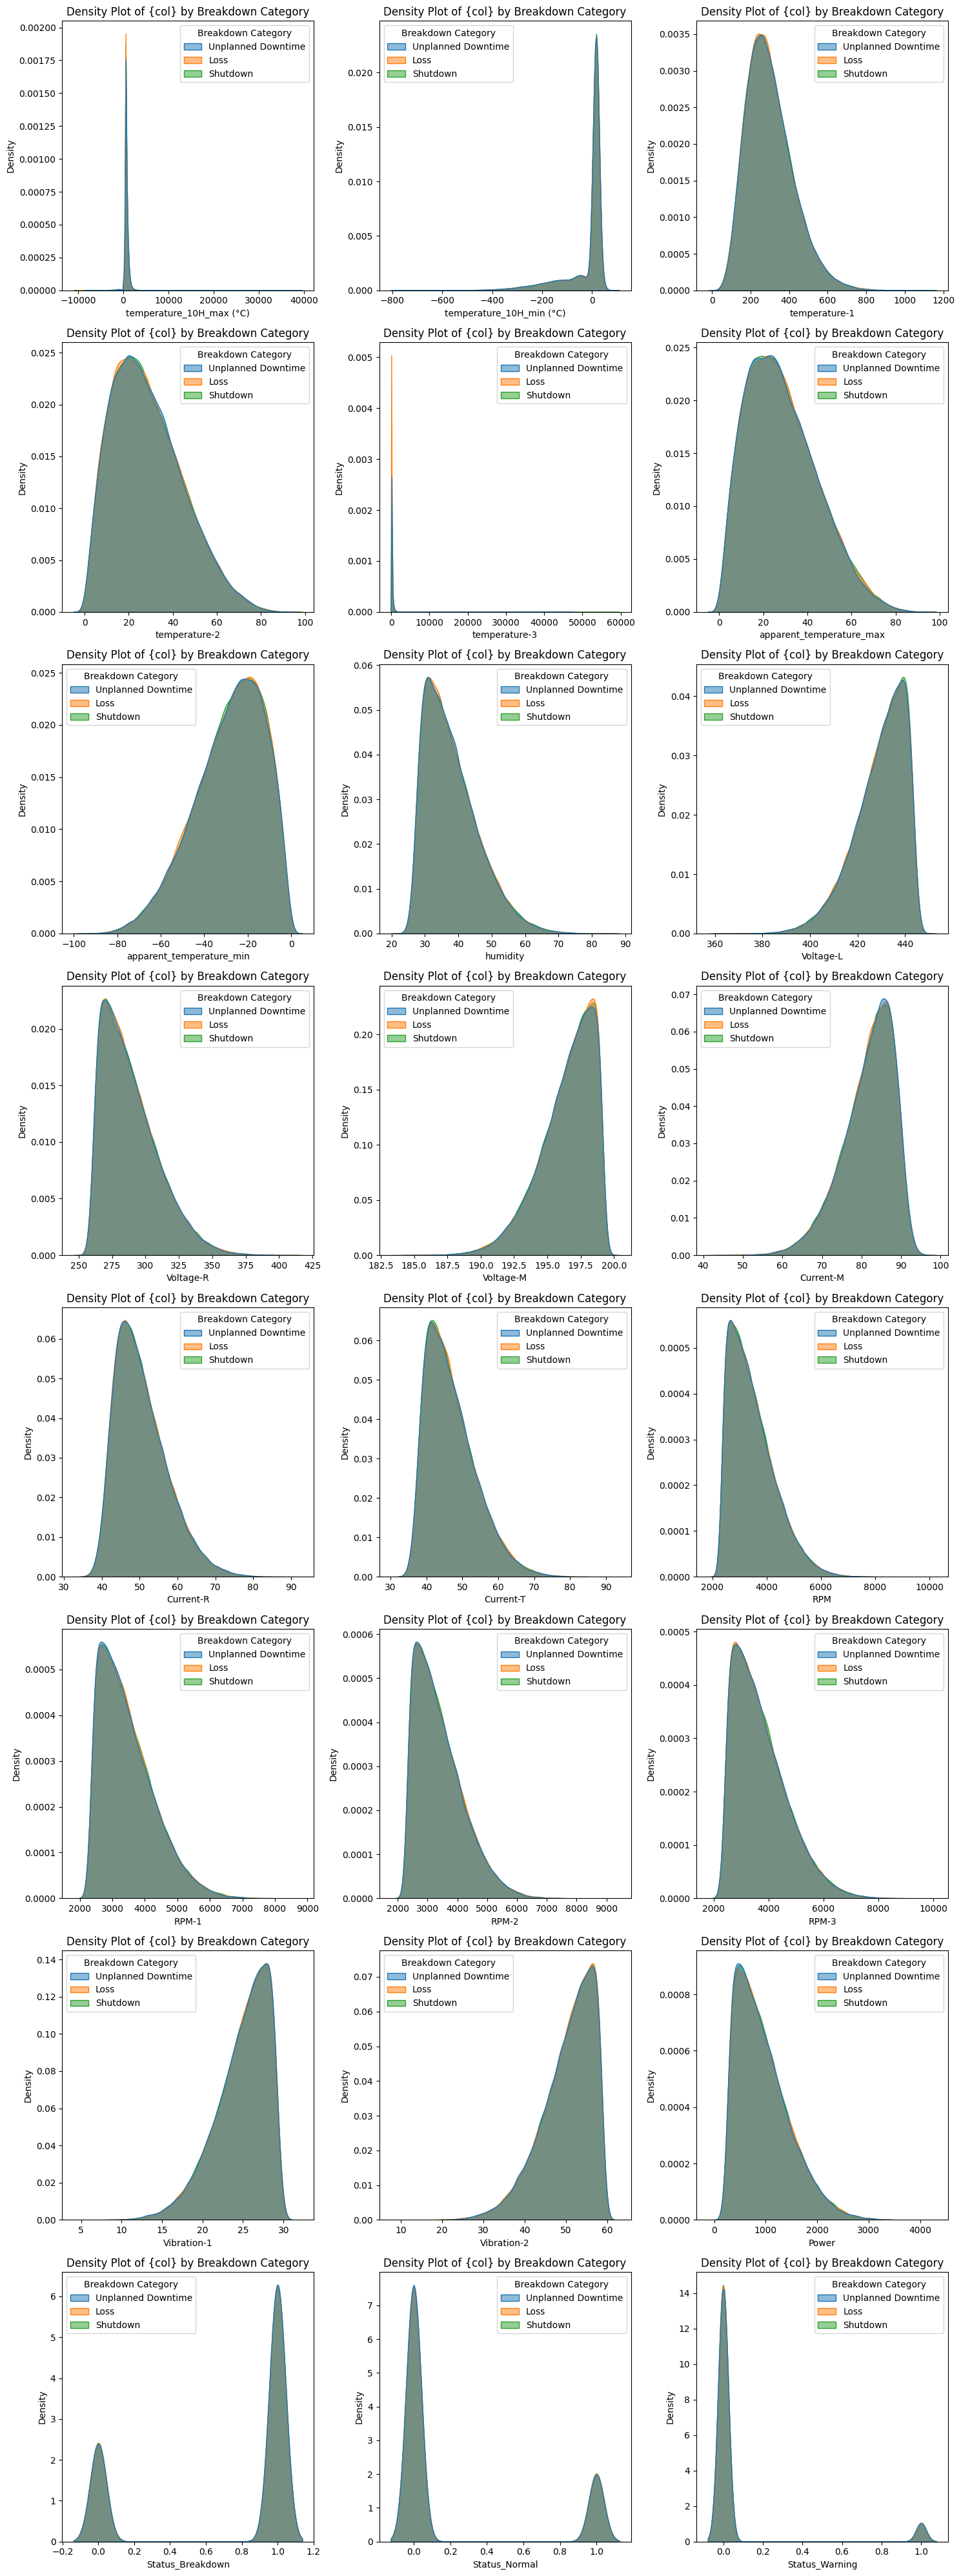

In [13]:
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=train_df, x=col, hue='Breakdown Category', fill=True, common_norm=False, alpha=0.5, ax=axes[i])
    axes[i].set_title('Density Plot of {col} by Breakdown Category')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


### Skewness Analysis

In [14]:
skewness = train_df[numeric_columns].skew()
print(skewness)

temperature_10H_max (°C)    19.471556
temperature_10H_min (°C)    -2.448249
temperature-1                0.810373
temperature-2                0.593106
temperature-3               72.484143
apparent_temperature_max     0.594887
apparent_temperature_min    -0.595935
humidity                     0.955087
Voltage-L                   -0.959946
Voltage-R                    0.976499
Voltage-M                   -0.980178
Current-M                   -0.854136
Current-R                    0.855655
Current-T                    0.918575
RPM                          0.980438
RPM-1                        0.976423
RPM-2                        0.980584
RPM-3                        0.984891
Vibration-1                 -0.960691
Vibration-2                 -0.974023
Power                        0.976379
Status_Breakdown             1.584561
Status_Normal               -0.470868
Status_Warning               1.532289
dtype: float64


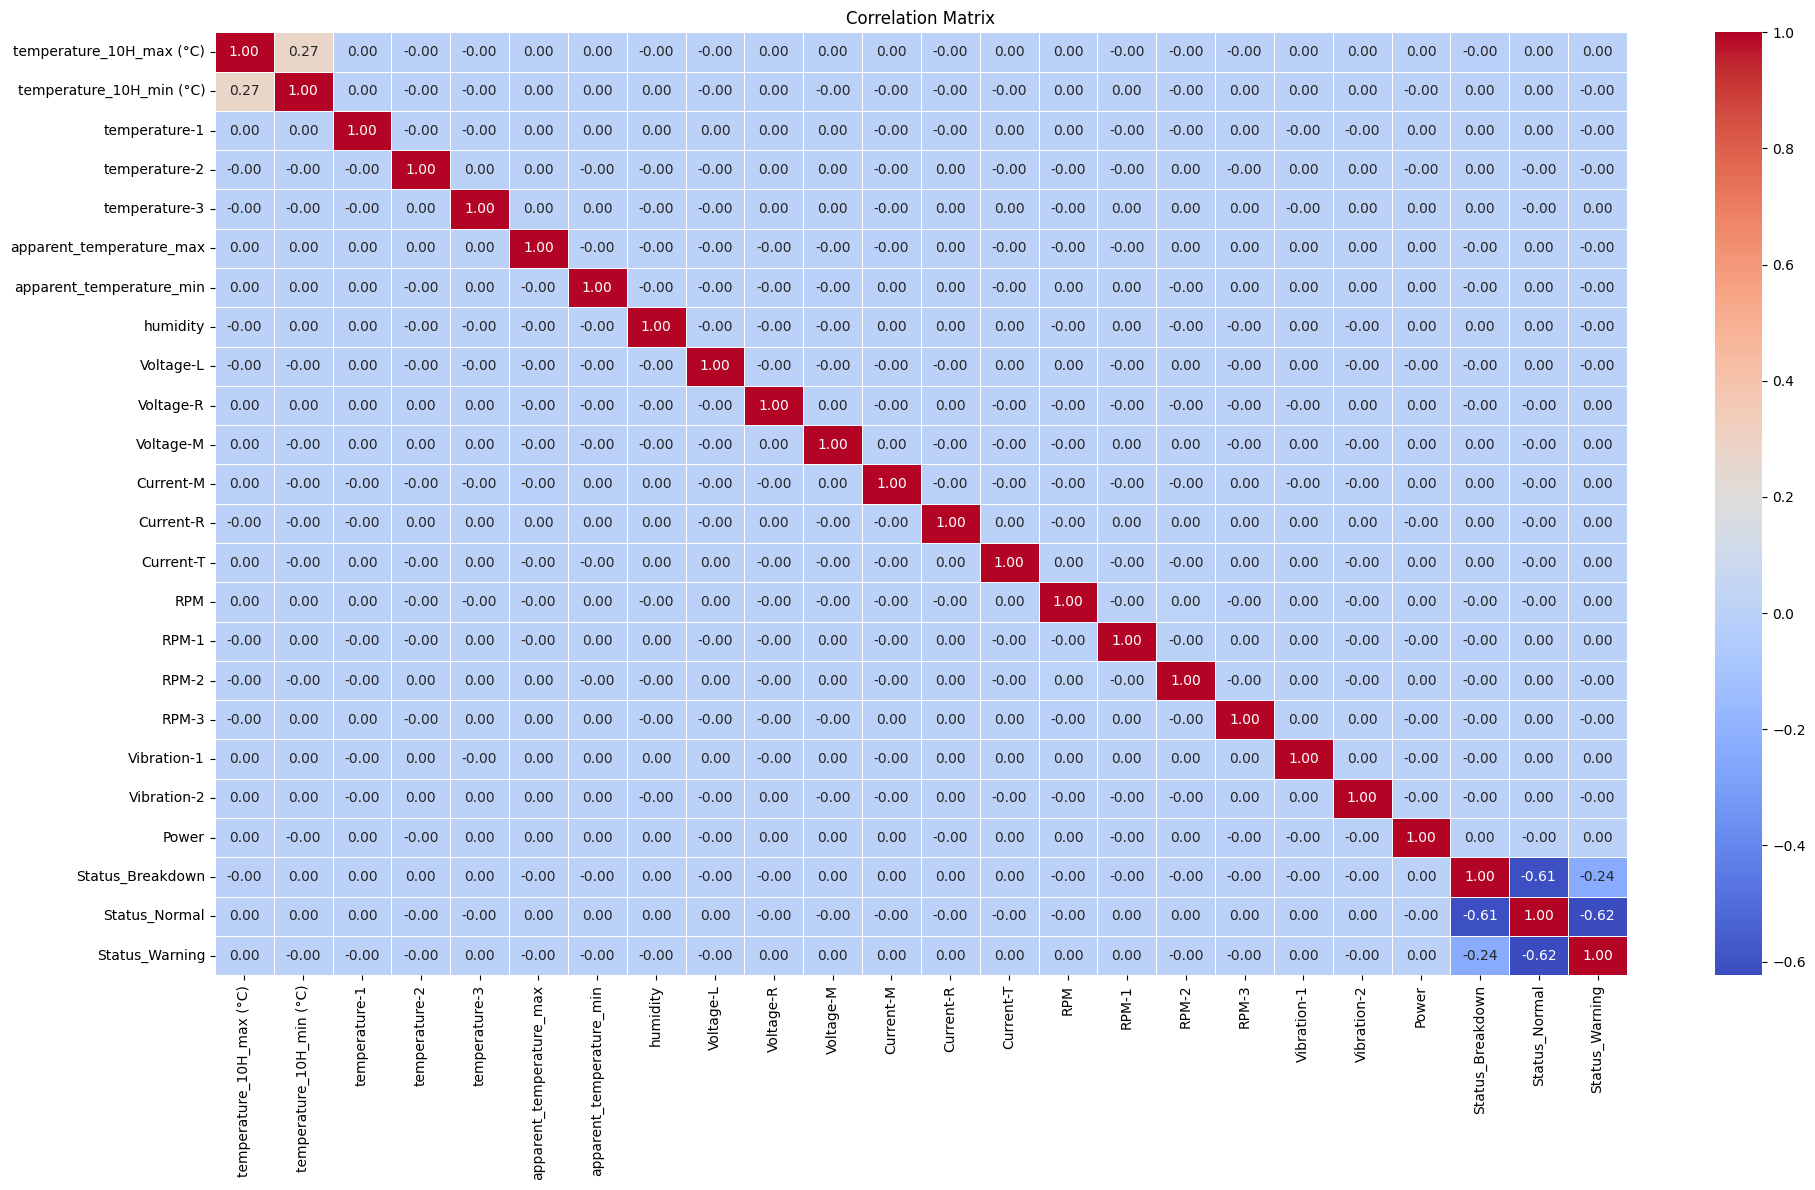

In [59]:
corr_matrix = train_df[numeric_columns].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig("assets/correlation_matrix.png")
plt.show()

In [16]:
sample = train_df.drop(columns=['Breakdown Category'])
sampe = sample.dropna(inplace=True)

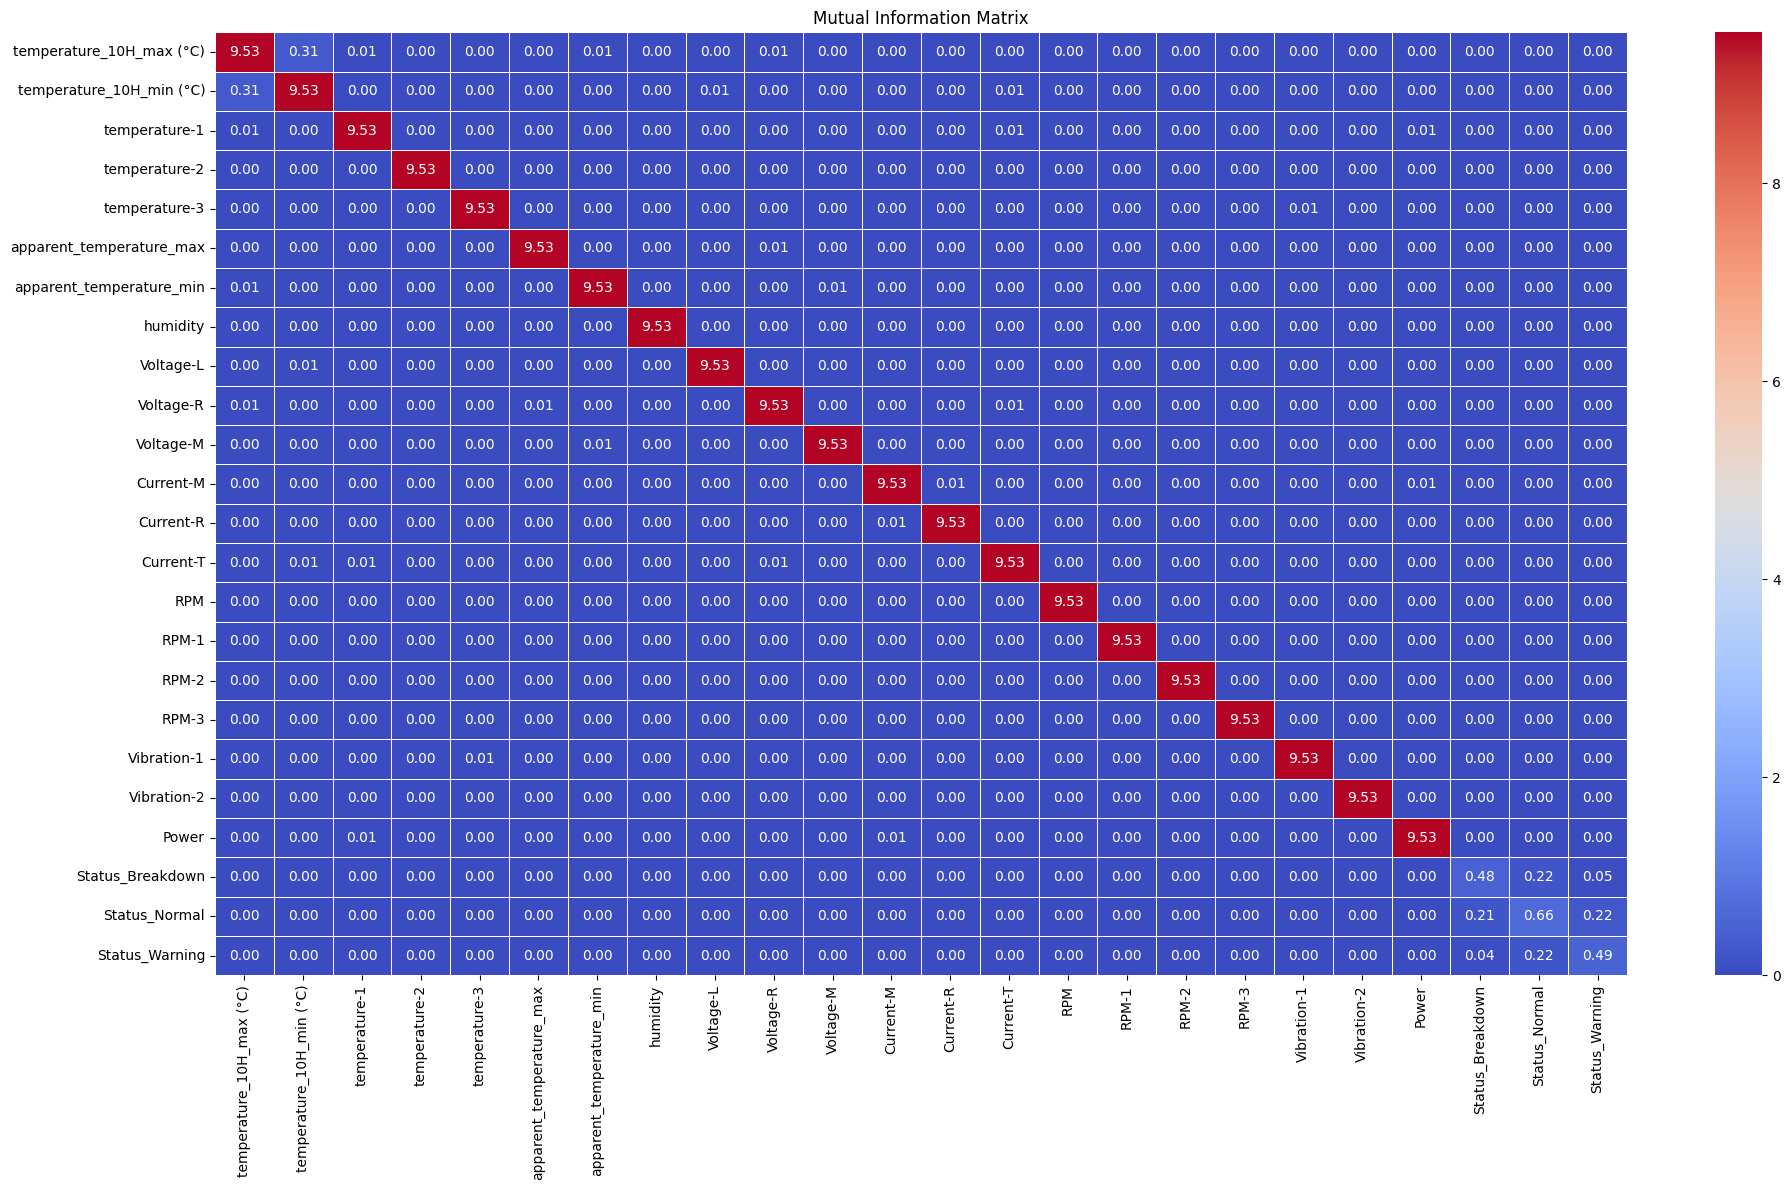

In [17]:
mutual_info_matrix = pd.DataFrame(
    [
        [
            mutual_info_regression(sample[[col1]], sample[col2])[0]
            for col2 in numeric_columns
        ]
        for col1 in numeric_columns
    ],
    columns=numeric_columns,
    index=numeric_columns
)

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(mutual_info_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mutual Information Matrix')
plt.tight_layout()
plt.show()

In [18]:
breakdown = train_df.groupby('Breakdown Category')['Status']
missing_B = train_df[train_df['Breakdown Category'].isna()]

In [19]:
breakdown.value_counts()

Breakdown Category  Status   
Loss                Breakdown    63252
                    Normal       18353
                    Warning       5909
Shutdown            Breakdown    63100
                    Normal       18589
                    Warning       5876
Unplanned Downtime  Breakdown    63149
                    Normal       17995
                    Warning       5988
Name: count, dtype: int64

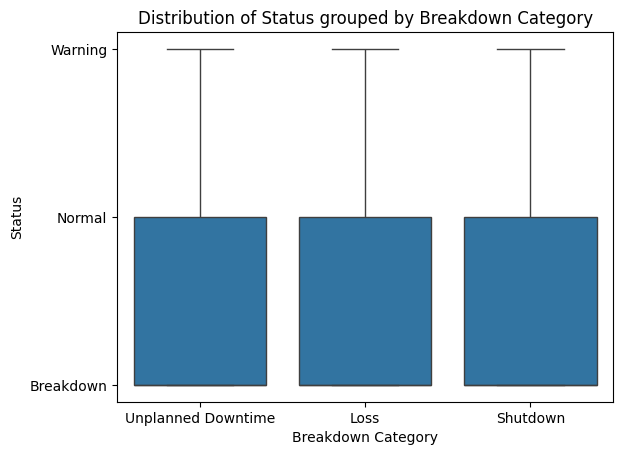

In [60]:
sns.boxplot(x='Breakdown Category', y='Status', data=train_df)
plt.title("Distribution of Status grouped by Breakdown Category")
plt.savefig("assets/breakdown_status_distribution.png")
plt.show()

In [21]:
missing_B['Status'].value_counts()

Status
Normal     559647
Warning    178142
Name: count, dtype: int64

In [22]:
contingency_table = pd.crosstab(train_df['Breakdown Category'], train_df['Status'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Status              Breakdown  Normal  Warning
Breakdown Category                            
Loss                    63252   18353     5909
Shutdown                63100   18589     5876
Unplanned Downtime      63149   17995     5988


In [23]:
print("Feature Variances:")
print(train_df[numeric_columns].var())

Feature Variances:
temperature_10H_max (°C)    456494.821236
temperature_10H_min (°C)      7628.213053
temperature-1                14940.850041
temperature-2                  255.324969
temperature-3               144424.208517
apparent_temperature_max       254.845571
apparent_temperature_min       255.439539
humidity                        65.307665
Voltage-L                      116.341727
Voltage-R                      432.243872
Voltage-M                        4.150001
Current-M                       42.705337
Current-R                       47.334258
Current-T                       48.572560
RPM                         697008.720743
RPM-1                       697660.027415
RPM-2                       649673.675721
RPM-3                       958698.107583
Vibration-1                     11.055218
Vibration-2                     40.637662
Power                       265637.897453
Status_Breakdown                 0.153591
Status_Normal                    0.236871
Status_Warning 

## Combining Datasets

### Filtering `machine_area_df`

In [10]:
machine_area_df['Last Maintenance'] = pd.to_datetime(machine_area_df['Last Maintenance'])

machine_area_df = machine_area_df.sort_values(by=['ID_Area', 'ID_Mesin', 'Last Maintenance'], ascending=[True, True, False])

machine_area_df = machine_area_df.drop_duplicates(subset=['ID_Area', 'ID_Mesin'], keep='first')

machine_area_df

,ID_Mesin,Mesin,Country Machine,ID_Area,Last Maintenance,Status Sparepart,Age
1007,A.1,NL1,JP,ID1,2020-11-23,On Check,4
601,A.3,Risco-TR700,CN,ID1,2021-11-12,Empty,8
885,B.2,Stuffer Linker 4,KR,ID1,2020-11-07,On Check,11
783,B.4,Novamax,US,ID1,2021-04-26,On Check,7
956,C.1,NL3,US,ID1,2021-06-22,Repair,18
...,...,...,...,...,...,...,...
71,I.1,Mixer Xiaojin,CN,ID9,2020-06-27,In Use,3
1169,I.3,Vacuum Filler-2,US,ID9,2020-06-05,Empty,4
187,J.2,Risco-TR500,US,ID9,2020-07-30,On Check,17
200,J.4,Palletizer-5,US,ID9,2020-09-14,In Use,12


In [8]:
combined_df: pd.DataFrame = pd.merge(train_df, area_list_df, on='ID_Area', how='left')
combined_df = pd.merge(train_df, machine_list_df, left_on='Machine', right_on='ID_Mesin', how='left')
combined_df = pd.merge(train_df, machine_area_df, left_on=['Machine', 'ID_Area'], right_on=['ID_Mesin', 'ID_Area'], how='left')
print(len(combined_df))

1000000


In [9]:
combined_df.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,Machine,timestamp,humidity,Voltage-L,Voltage-R,Voltage-M,Current-M,Current-R,Current-T,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup,Status,Breakdown Category,ID_Mesin,Mesin,Country Machine,Last Maintenance,Status Sparepart,Age
0,TRXc8f4c2dcbfe501093501015b32bd0ba2,1110.970519,NaN,106.145582,38.779147,262.330188,33.916720,NaN,ID12,A.4,2024-05-16 18:45:00,32.934760,442.950243,265.475772,NaN,88.821841,53.422784,41.518015,2666.124927,2956.904780,4779.579998,3681.056129,19.624641,40.938353,NaN,Yes,Warning,NaN,A.4,Vacuum Filler-5,JP,2021-05-05,Broken,8.0
1,TRXe9e6c37fc1281efd6c5ba52fce259584,608.487665,19.932166,375.386134,17.736401,45.051041,4.542451,-21.991755,ID37,K.3,2023-10-13 15:39:00,29.456207,431.526628,290.981690,194.964512,84.310342,54.814047,61.479412,2907.253211,2773.384487,4282.046671,4527.123292,28.167360,NaN,311.803841,Yes,Normal,NaN,K.3,Vacuum Filler-4,KR,2020-02-12,On Check,1.0
2,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,ID24,J.1,2024-09-04 03:31:00,51.354324,427.396277,295.878727,195.645951,82.999774,45.431631,44.895073,3215.057495,3072.879720,4180.407796,4841.741619,29.843080,46.980726,1257.681079,No,Normal,NaN,J.1,Stuffer Linker 1,JP,2021-01-24,Broken,12.0
3,TRX06f9e5574a639bcedb7ec8c3cb9fbaa4,710.093309,26.190643,294.871314,30.639358,140.984886,18.843502,-39.872275,ID7,J.4,2023-02-24 00:05:00,29.078738,442.049199,270.479911,198.752004,75.225441,48.743306,NaN,4361.849341,3295.409873,3337.288244,3877.348905,28.720636,54.860603,478.325694,No,Breakdown,Unplanned Downtime,J.4,Palletizer-5,US,2021-10-22,In Use,2.0
4,TRXd8f3a5ce90d25127ba3240a12eb9c140,410.114364,9.664961,185.267516,28.154454,57.002150,23.915704,NaN,ID41,J.2,2023-06-22 05:37:00,26.652919,441.089354,292.828266,194.901935,61.954375,44.174406,NaN,4817.893609,3084.624619,NaN,2501.387065,26.907301,NaN,674.159077,Yes,Breakdown,Unplanned Downtime,J.2,Risco-TR500,US,2020-01-14,Broken,4.0


In [27]:
combined_df['Status Sparepart'] = combined_df['Status Sparepart'].map({'Broken' : 0, 'Onn Check' : 1, 'In Use' : 2, 'Repair' : 3,
                                                                       'Empty' : 4, 'Ready' : 5})

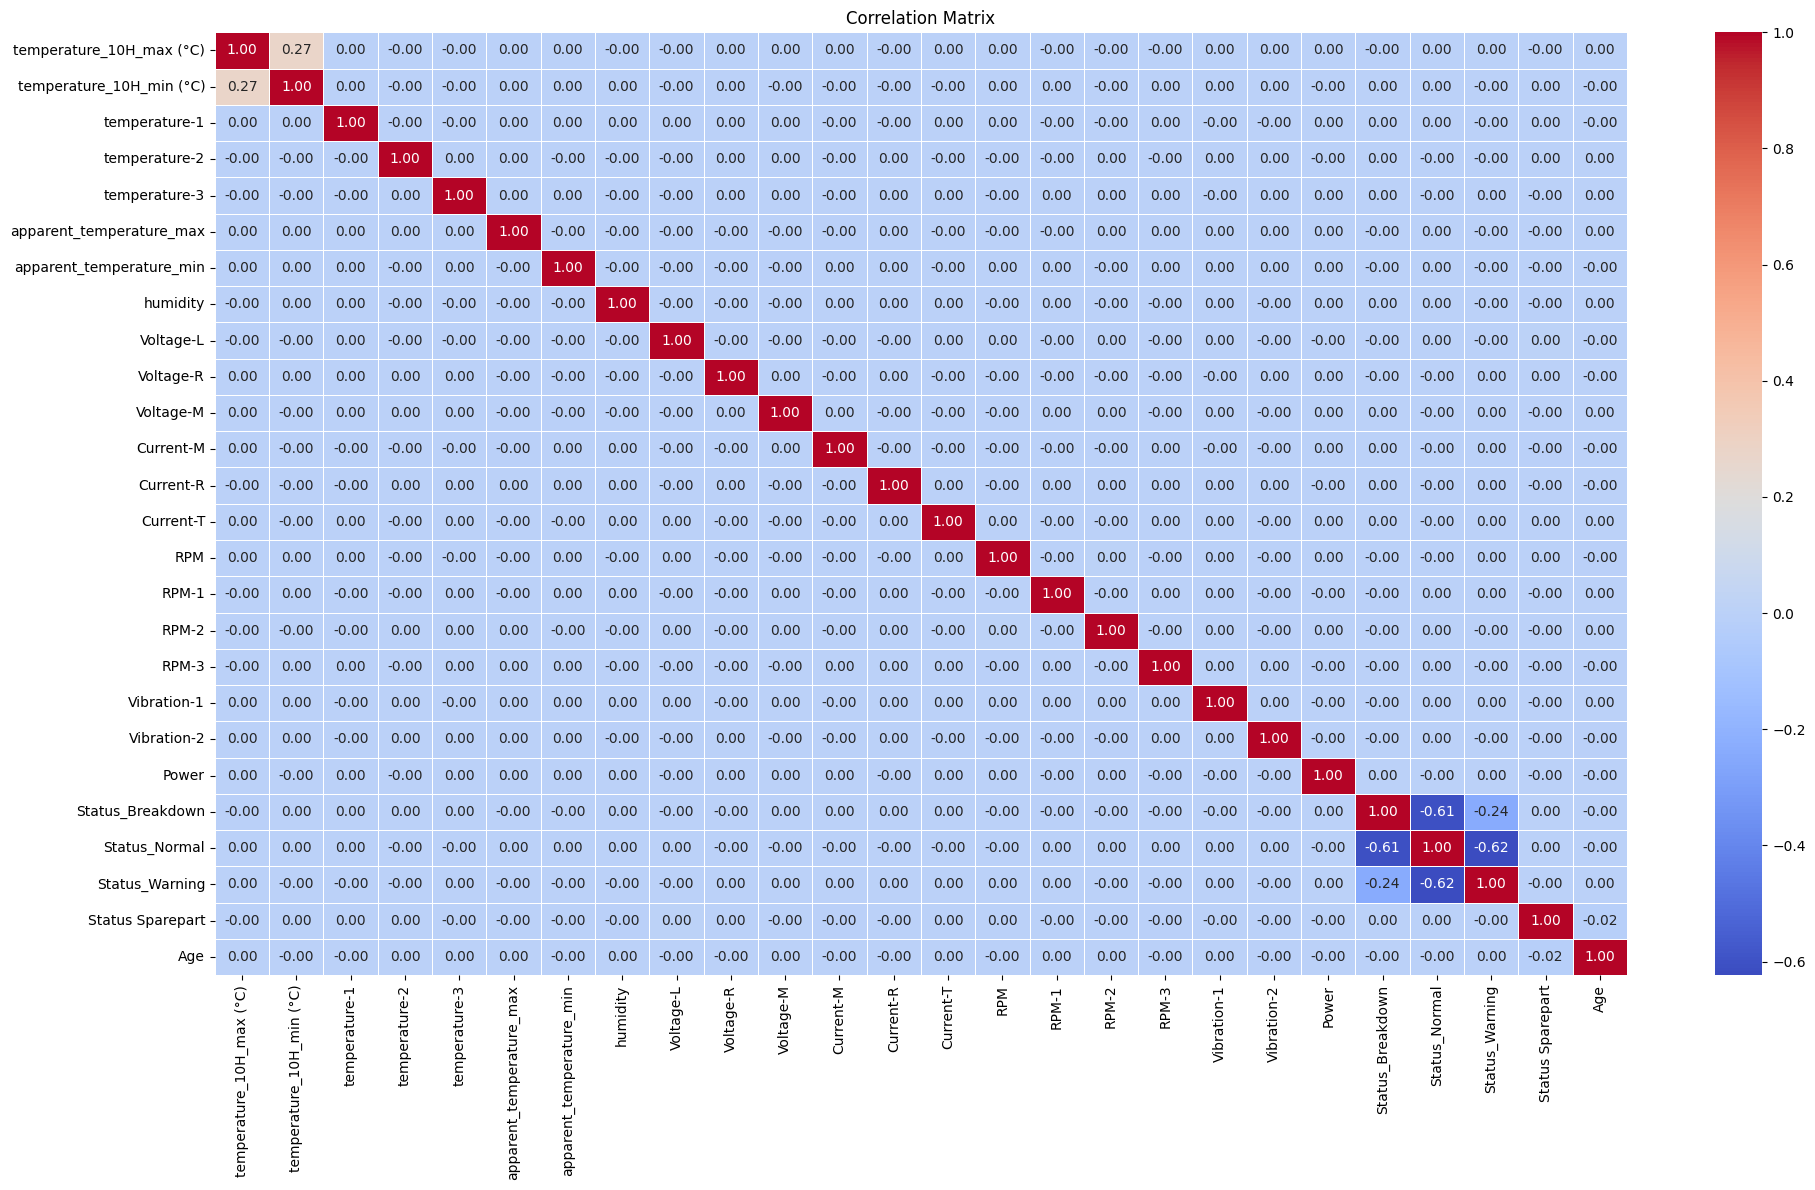

In [29]:
corr_df = combined_df.drop(columns=['ID_Transaction', 'ID_Area', 'ID_Mesin', 'Machine', 'timestamp', 'Mesin', 'Country Machine', 'Last Maintenance'])
corr_matrix = corr_df.corr(numeric_only=True)

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Specific Questions

### Are all the `ID_Area` values in `Machine-List.csv` are also in `Area-List.csv` ?

**Answer = `Yes`**

In [30]:
machine_area_df['ID_Area'].isin(area_list_df['ID_Area']).value_counts()

ID_Area
True    822
Name: count, dtype: int64

### Are all the `ID_Mesin` values in `Machine-List.csv` are also in `Machine-Area.csv` ?

**Answer = `Yes`**

In [31]:
machine_area_df['ID_Mesin'].isin(machine_list_df['ID_Mesin']).value_counts()

ID_Mesin
True    822
Name: count, dtype: int64

### Are the `ID_Area` and `ID_Mesin` dependant to each other ?

Answer = `No`

In [32]:
machine_area_df[['ID_Area', 'ID_Mesin']].value_counts().sort_values(ascending=False).head(10)

ID_Area  ID_Mesin
ID1      A.1         1
         F.4         1
         G.1         1
         B.2         1
         B.4         1
         C.1         1
         C.3         1
         D.2         1
         D.4         1
         E.1         1
Name: count, dtype: int64

In [33]:
machine_area_df[['ID_Mesin', 'ID_Area']].value_counts().sort_values(ascending=False).head(10)

ID_Mesin  ID_Area
A.1       ID1        1
          ID3        1
          ID31       1
          ID13       1
          ID15       1
          ID17       1
          ID19       1
          ID21       1
          ID23       1
          ID25       1
Name: count, dtype: int64

### Is `Mesin` unique to `ID_Mesin` in `Machine-List.csv` ?

Answer = `Yes`

In [34]:
machine_list_df[["Mesin", "ID_Mesin"]].value_counts().sort_values(ascending=False).head()

Mesin        ID_Mesin
Bowl Cutter  F.3         1
Forklift     E.4         1
NL3          C.1         1
Formax       E.3         1
Hitech-1     D.1         1
Name: count, dtype: int64

In [35]:
machine_list_df[["ID_Mesin", "Mesin"]].value_counts().sort_values(ascending=False).head()

ID_Mesin  Mesin           
A.1       NL1                 1
A.2       Stuffer Linker 3    1
C.3       Jawfeng             1
A.3       Risco-TR700         1
A.4       Vacuum Filler-5     1
Name: count, dtype: int64

### Is the data consistent between `Machine-Area.csv` and `Machine-List.csv` ?

Answer = `Yes`

In [36]:
_ = pd.merge(machine_list_df, machine_area_df, on='ID_Mesin', suffixes=('_list', '_area'))

print("Amount of inconsistencies: ",
    len(_[
        (_['Mesin_list'] != _['Mesin_area']) |
        (_['Country Machine_list'] != _['Country Machine_area'])]))

Amount of inconsistencies:  0


### Are all the `Machine` and `ID_Area` in `Machine-Area.csv` ?

Answer = `No`

In [37]:
main_pairs = set(train_df[['Machine', 'ID_Area']].dropna().drop_duplicates().itertuples(index=False, name=None))
machine_area_pairs = set(machine_area_df[['ID_Mesin', 'ID_Area']].dropna().drop_duplicates().itertuples(index=False, name=None))

if main_pairs == machine_area_pairs:
    print("The pairs of 'Machine' and 'ID Area' are consistent between the datasets.")
else:
    in_main_not_in_machine_area = main_pairs - machine_area_pairs
    in_machine_area_not_in_main = machine_area_pairs - main_pairs

    print("The pairs of 'Machine' and 'ID Area' are inconsistent.")
    print("In 'Main' but not in 'Machine-Area':", in_main_not_in_machine_area)
    print("In 'Machine-Area' but not in 'Main':", in_machine_area_not_in_main)


The pairs of 'Machine' and 'ID Area' are inconsistent.
In 'Main' but not in 'Machine-Area': {('D.1', 'ID20'), ('B.1', 'ID34'), ('E.4', 'ID28'), ('B.4', 'ID25'), ('G.4', 'ID24'), ('E.3', 'ID19'), ('G.3', 'ID7'), ('D.3', 'ID20'), ('J.1', 'ID32'), ('K.1', 'ID23'), ('H.1', 'ID14'), ('H.3', 'ID42'), ('I.3', 'ID7'), ('H.1', 'ID8'), ('E.1', 'ID15'), ('E.3', 'ID5'), ('E.1', 'ID35'), ('H.3', 'ID8'), ('D.4', 'ID9'), ('J.4', 'ID19'), ('D.4', 'ID13'), ('G.1', 'ID23'), ('D.1', 'ID36'), ('F.4', 'ID35'), ('J.3', 'ID34'), ('F.4', 'ID29'), ('D.1', 'ID12'), ('D.4', 'ID39'), ('B.2', 'ID37'), ('E.1', 'ID25'), ('G.1', 'ID3'), ('C.4', 'ID16'), ('J.3', 'ID32'), ('F.2', 'ID23'), ('K.3', 'ID9'), ('H.2', 'ID13'), ('B.2', 'ID25'), ('G.3', 'ID19'), ('K.2', 'ID10'), ('J.2', 'ID25'), ('G.2', 'ID16'), ('G.1', 'ID35'), ('K.4', 'ID36'), ('B.4', 'ID31'), ('F.1', 'ID40'), ('F.3', 'ID4'), ('K.4', 'ID42'), ('K.2', 'ID4'), ('E.1', 'ID29'), ('A.2', 'ID10'), ('C.1', 'ID9'), ('C.3', 'ID25'), ('B.1', 'ID38'), ('D.4', 'ID41'), 

### Is the `ID_Area` and `ID_Mesin` pair in `Machine-Area.df` unique ?

Answer = `No`

In [54]:
machine_area_df_og = pd.read_csv("dataset/Machine-Area.csv")

In [ ]:
duplicates = machine_area_df.groupby(['ID_Area', 'ID_Mesin']).filter(lambda x: len(x) > 1)

duplicates.sort_values(by=['ID_Mesin', 'ID_Area'])

,ID_Mesin,Mesin,Country Machine,ID_Area,Last Maintenance,Status Sparepart,Age
277,A.1,NL1,JP,ID11,2021-01-19,Ready,18
488,A.1,NL1,JP,ID11,2021-02-20,On Check,20
483,A.1,NL1,JP,ID23,2021-09-04,Empty,18
550,A.1,NL1,JP,ID23,2021-07-13,Repair,18
47,A.1,NL1,JP,ID27,2021-05-01,Empty,10
...,...,...,...,...,...,...,...
655,K.4,Palletizer-6,CN,ID40,2021-09-27,Empty,9
142,K.4,Palletizer-6,CN,ID6,2020-12-08,Broken,9
784,K.4,Palletizer-6,CN,ID6,2020-11-07,On Check,9
809,K.4,Palletizer-6,CN,ID8,2020-02-08,On Check,5


### Is there any correlation between `na` and `status`

Answer = Only for `breakdown_category`

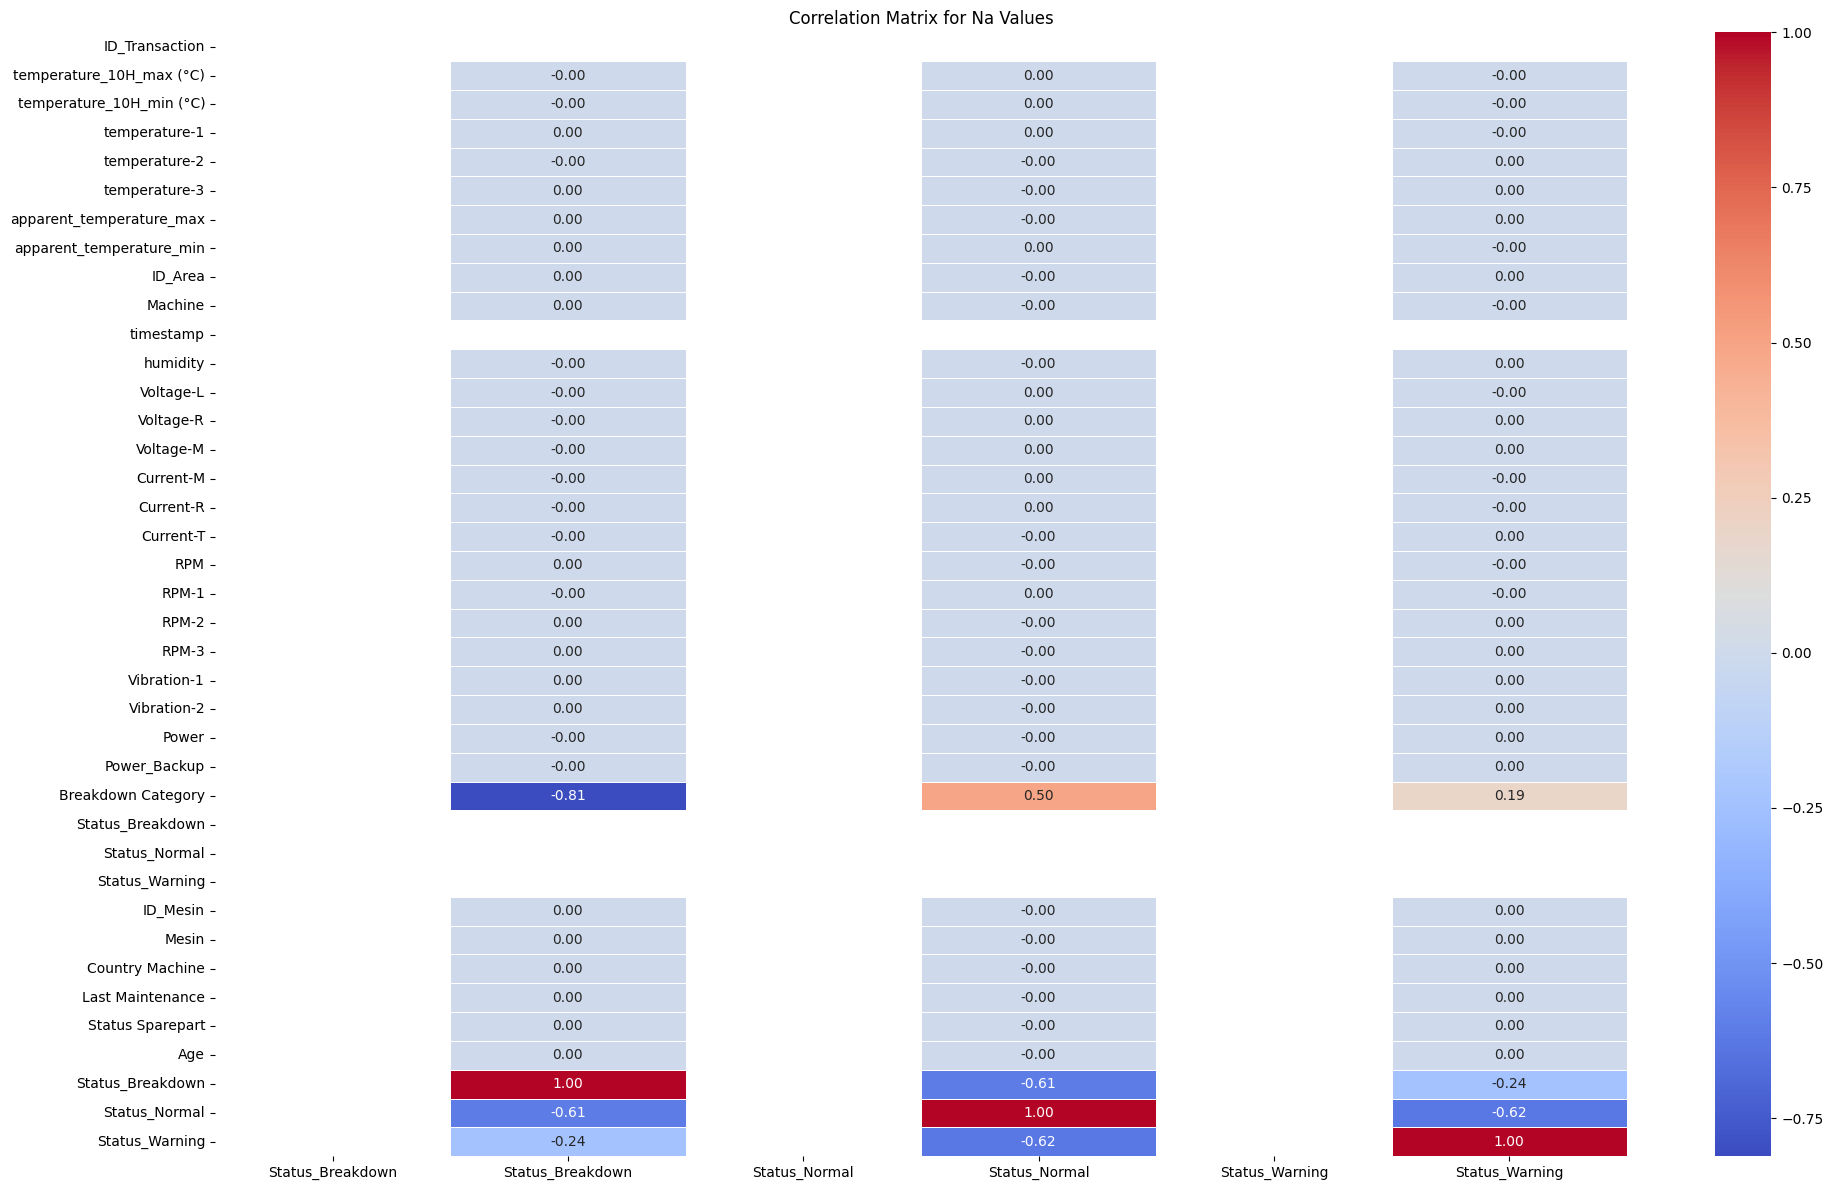

In [57]:
_ = combined_df.copy()

for col in _.columns:
    if col != 'Status':
        _[col] = _[col].isna().astype(int)

_Status = pd.get_dummies(_['Status'], prefix = "Status").astype(int)
_ = _.drop(columns=['Status'])
_ = pd.concat([_, _Status], axis=1)

_corr = _.corr()[['Status_Breakdown', 'Status_Normal', 'Status_Warning']]

plt.figure(figsize=(20, 12))
sns.heatmap(_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix for Na Values')
plt.tight_layout()
plt.savefig("assets/na_correlation.png")
plt.show()

### Is there any correlation between the delta `temperature_10H` and `status`

Answer = `No`

C:\Users\Adli\AppData\Local\Temp\ipykernel_13876\857518397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _.loc[:,'delta_temperature'] = _['temperature_10H_max (°C)'] - _['temperature_10H_min (°C)']


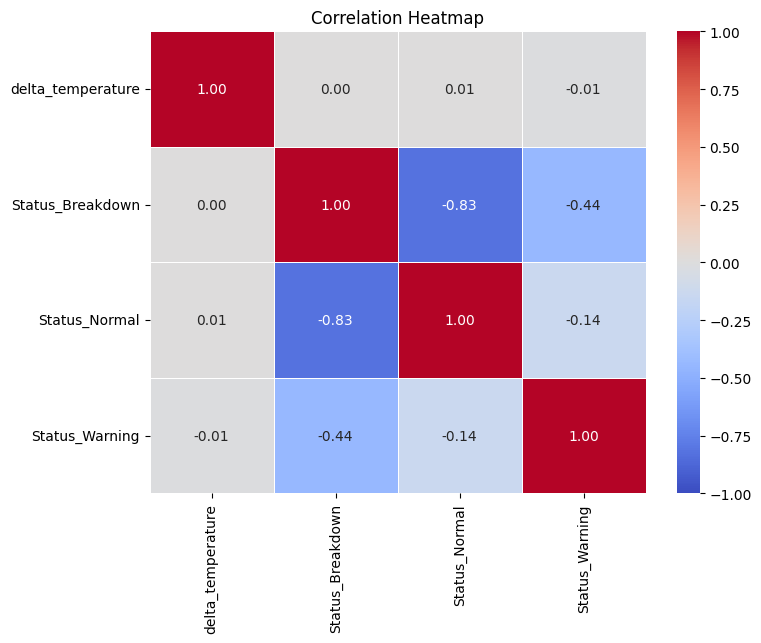

Breakdown average delta:  627.922797252556
Warning average delta:  601.3219778536898
Normal average delta:  635.2222242936855


In [40]:
_ = combined_df
_ = _.dropna()
_.loc[:,'delta_temperature'] = _['temperature_10H_max (°C)'] - _['temperature_10H_min (°C)']

_corr = _[['delta_temperature', 'Status_Breakdown', 'Status_Normal', 'Status_Warning']].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

print("Breakdown average delta: ", _.loc[_['Status_Breakdown'] == 1]['delta_temperature'].median())
print("Warning average delta: ", _.loc[_['Status_Warning'] == 1]['delta_temperature'].median())
print("Normal average delta: ", _.loc[_['Status_Normal'] == 1]['delta_temperature'].median())

### Is there any correlation between `First Maintenance` and `Age` in `combined_df` ?

In [25]:
_ = combined_df.copy()


_['first_maintenance'] = _.groupby(['ID_Mesin', 'ID_Area'])['Last Maintenance'].transform('min')


In [38]:
_['delta_timespan'] = _['Age'] - (2020 - _['first_maintenance'].dt.year)

In [39]:
_['delta_timespan']

0          9.0
1          1.0
2         13.0
3          3.0
4          4.0
          ... 
999995     8.0
999996    16.0
999997    11.0
999998     1.0
999999     NaN
Name: delta_timespan, Length: 1000000, dtype: float64

In [40]:
_['delta_timespan'].describe()

count    604870.000000
mean         10.755764
std           5.752464
min           1.000000
25%           6.000000
50%          10.000000
75%          16.000000
max          21.000000
Name: delta_timespan, dtype: float64

In [41]:
_['Age'].describe()

count    604870.000000
mean         10.181999
std           5.735767
min           1.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Age, dtype: float64

In [42]:
_[['Age', 'delta_timespan']].corr()

,Age,delta_timespan
Age,1.000000,0.996298
delta_timespan,0.996298,1.000000


In [44]:
_['inacuraccy'] = _['Age'] - _['delta_timespan']

In [45]:
_['inacuraccy'].describe()

count    604870.000000
mean         -0.573765
std           0.494529
min          -1.000000
25%          -1.000000
50%          -1.000000
75%           0.000000
max           0.000000
Name: inacuraccy, dtype: float64